In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

Text(0.5, 1.0, 'White wine quality classes')

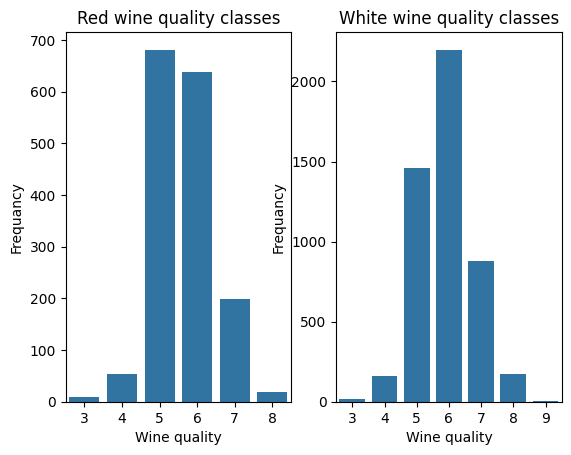

In [13]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, f1_score
from sklearn import linear_model, svm, neural_network
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
# divide into red/white dataset
red_x = X.iloc[:1598].values
white_x = X.iloc[1599:].values
red_y = np.ravel(y.iloc[:1598].values)
white_y = np.ravel(y.iloc[1599:].values)

# classes distribution
plt.subplot(1,2,1)
sns.countplot(x= red_y)
plt.xlabel('Wine quality')
plt.ylabel('Frequancy')
plt.title('Red wine quality classes')
plt.subplot(1,2,2)
sns.countplot(x= white_y)
plt.xlabel('Wine quality')
plt.ylabel('Frequancy')
plt.title('White wine quality classes')

In [11]:
class model_selection():
    def __init__(self, MR=False, nn=False, SVM=False, randomforest=False, ada=False, gra=False):
        self.MR = MR
        self.nn = nn
        self.SVM = SVM
        self.forest = randomforest
        self.ada = ada
        self.gra = gra
    def build_model(self):
        if self.MR == True:
            pass
        elif self.nn == True:
            return neural_network.MLPClassifier(alpha=1e-3,
                        hidden_layer_sizes=(10, 5), random_state=42)
        elif self.SVM == True:
            md = svm.SVC(random_state=42, kernel='rbf', tol=0.25)
            return md
        elif self.forest == True:
            return RandomForestClassifier(random_state=42)
        elif self.ada == True:
            return AdaBoostClassifier(random_state=42)
        elif self.gra == True:
            return GradientBoostingClassifier(random_state=42)

        



<Figure size 640x480 with 0 Axes>

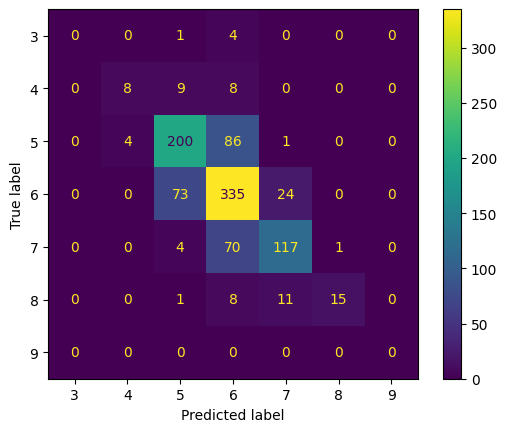

Mean absolute deviation: 0.3438775510204082
F1 score: 0.6832619544111135


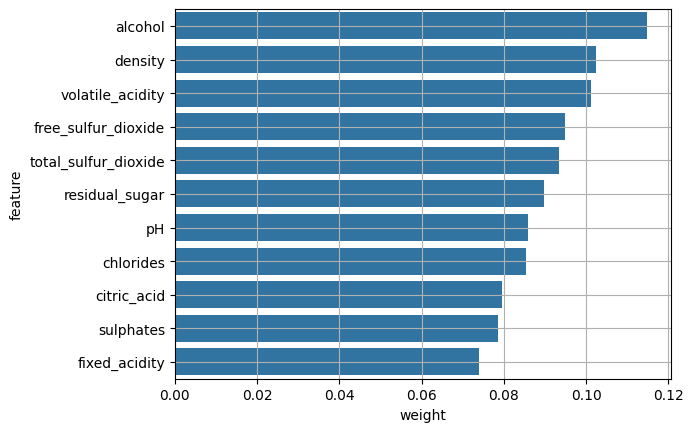

<Figure size 640x480 with 0 Axes>

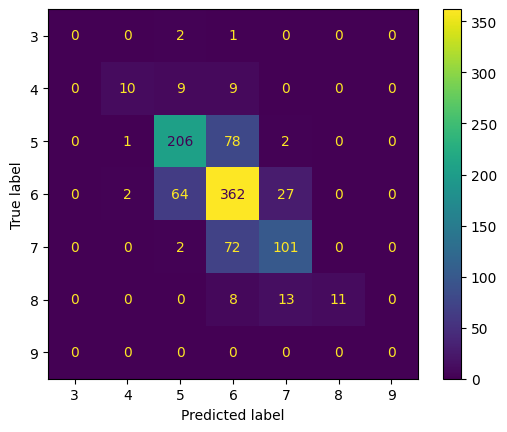

Mean absolute deviation: 0.32346938775510203
F1 score: 0.6970166468159573


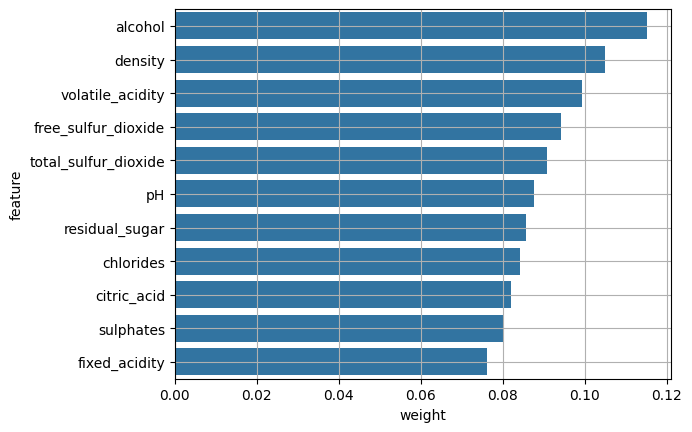

<Figure size 640x480 with 0 Axes>

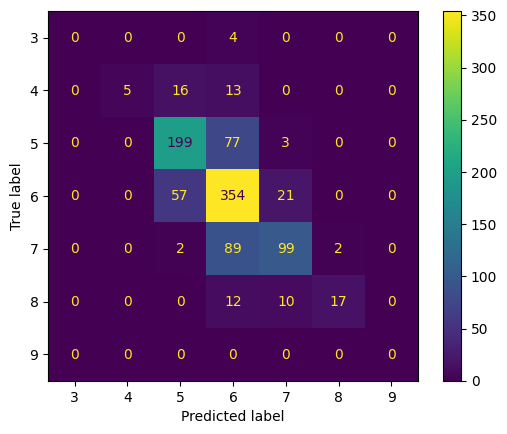

Mean absolute deviation: 0.3510204081632653
F1 score: 0.674623896492071


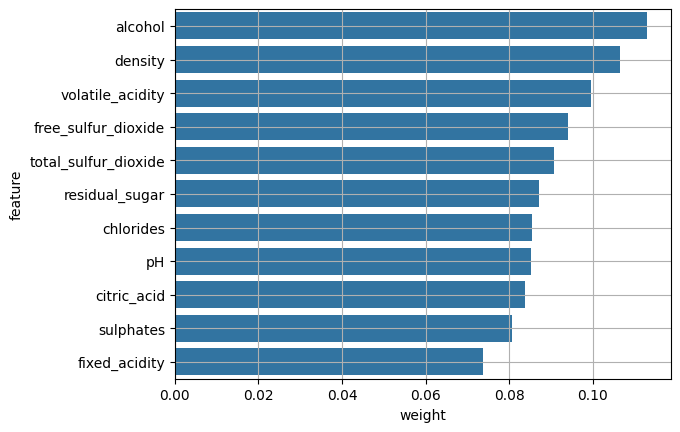

<Figure size 640x480 with 0 Axes>

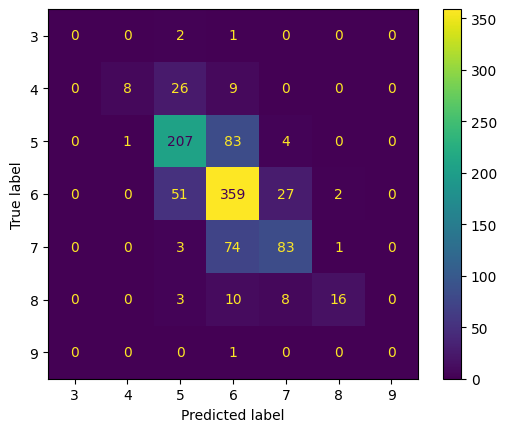

Mean absolute deviation: 0.3534218590398366
F1 score: 0.6739760770231761


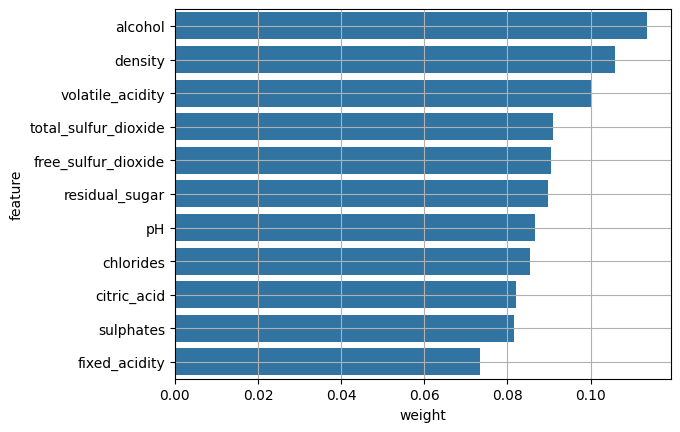

<Figure size 640x480 with 0 Axes>

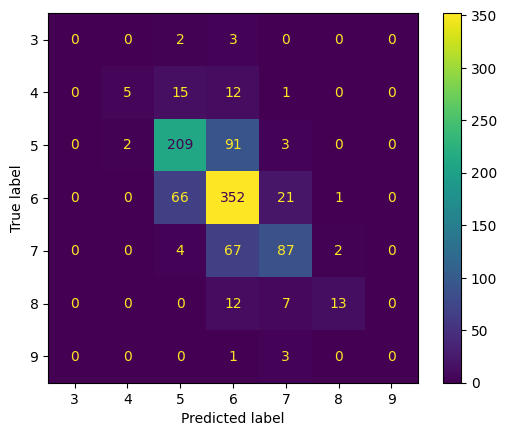

Mean absolute deviation: 0.36772216547497444
F1 score: 0.6671752172036917


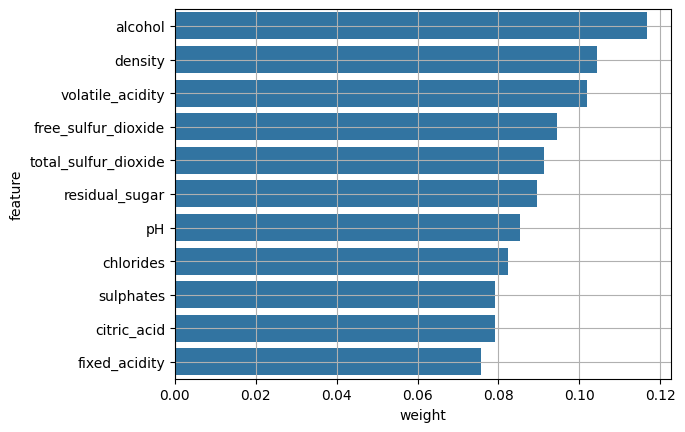

In [15]:
# white wine

# standalization
mean = np.mean(white_x, axis=0)
std = np.std(white_x, axis=0)
white_x = (white_x-mean)/std
# PCA
# white_x = PCA(n_components=2).fit_transform(white_x)

# cross-validation K=5
cf_matrix = []
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  

# train the model
obj = model_selection(randomforest=True)  # choose the algorithm
md = obj.build_model()
for train_id, test_id in k_fold.split(white_x):
    X_train, X_test = white_x[train_id], white_x[test_id]
    y_train, y_test = white_y[train_id], white_y[test_id]
    md.fit(X=X_train, y=y_train)
    pred_label = md.predict(X_test)
    cf_matrix = confusion_matrix(y_test, pred_label, labels=md.classes_)
    plt.figure()
    out = ConfusionMatrixDisplay(cf_matrix, display_labels=md.classes_)   # Confusion matrix 
    out.plot()
    plt.show()
    print("Mean absolute deviation: {}".format(mean_absolute_error(y_test, pred_label)))  # MAD
    print("F1 score: {}".format(f1_score(y_test, pred_label, average='weighted')))  # F1 score: （precision, recall）
    importance = pd.DataFrame({
    'feature' : X.columns,
    'weight' : md.feature_importances_
    }).sort_values(by='weight', ascending=False).reset_index(drop=True)
    sns.barplot(x=importance.weight, y=importance.feature).grid('both')   # randomforest feature importances

